In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [4]:
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [5]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(32,32,3)))
model.add(augmentation)
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [6]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [7]:
with tf.device("/CPU:0"):
    history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 114s 71ms/step - loss: 1.7516 - accuracy: 0.3603 - val_loss: 1.4111 - val_accuracy: 0.4900
Epoch 2/5
1563/1563 [==============================] - 74s 48ms/step - loss: 1.5238 - accuracy: 0.4523 - val_loss: 1.2878 - val_accuracy: 0.5343
Epoch 3/5
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4427 - accuracy: 0.4832 - val_loss: 1.2207 - val_accuracy: 0.5682
Epoch 4/5
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3983 - accuracy: 0.5026 - val_loss: 1.2087 - val_accuracy: 0.5712
Epoch 5/5
1563/1563 [==============================] - 74s 48ms/step - loss: 1.3580 - accuracy: 0.5139 - val_loss: 1.1317 - val_accuracy: 0.6054


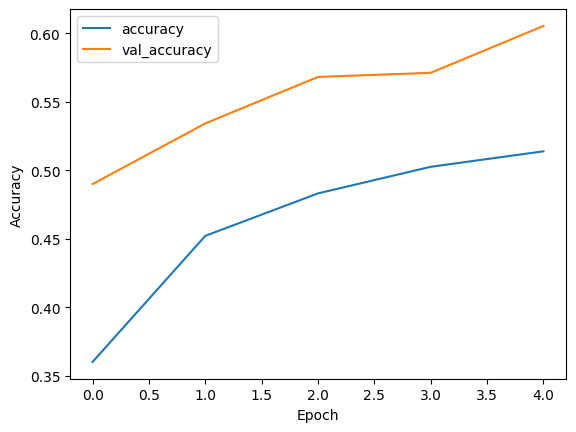

In [8]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

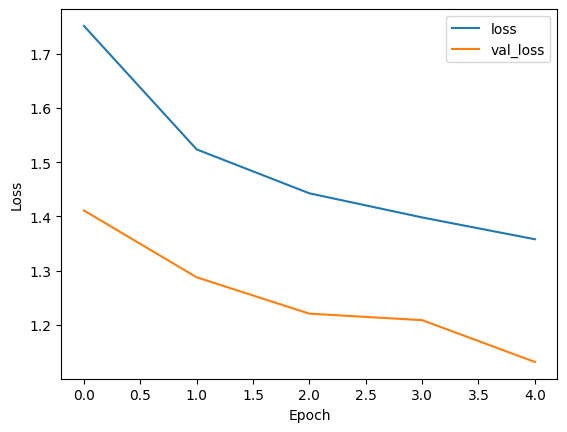

In [9]:
plt.plot(history.history['loss'],label="loss")
plt.plot(history.history['val_loss'],label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()